<h1><center>Heart Failure Prediction with Various Machine Learning Models</center></h1>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; text-align: justify"><span style="color:crimson;">Dilated cardiomyopathy (DCM)</span> is the most common type of heart disease, occurring mostly in adults 20 to 60. It affects the heart's ventricles and atria, the lower and upper chambers of the heart, respectively. Frequently the disease starts in the left ventricle, the heart's main pumping chamber. The heart muscle begins to dilate, meaning it stretches and becomes thinner. Consequently, the inside of the chamber enlarges. The problem often spreads to the right ventricle and then to the atria. As the heart chambers dilate, the heart muscle doesn't contract normally and cannot pump blood very well.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Source: <a href="https://www.heart.org/en/health-topics/cardiomyopathy/what-is-cardiomyopathy-in-adults/dilated-cardiomyopathy-dcm" target="_blank">Heart.org</a></p>


<center><img src="https://ac-cdn.azureedge.net/infusionnewssiteimages/agingcare/21e637ea-aa74-4ae2-b278-181d2cded7a3.jpg?fit=scale"></center>

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><b>Aim of this notebook 📚</b></p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; text-align: justify">In this notebook, I visualize the distribution of the variables in the <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data" target="_blank">Heart Failure Prediction</a> dataset and explore their relationship with the target variable <code>DEATH_EVENT</code>. Based on the result of this analysis, I define seven machine learning models to compare their performance on this dataset to predict the target variable using the most correlated subset of variables from the dataset.</p>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Thanks to <a href="https://www.kaggle.com/andrewmvd" target="_blank">Larxel</a> for posting this dataset on Kaggle!</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><h3>Lets see what our data looks like.</h3></p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><b>A sample from the data</b></p>

In [2]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
63,45.00,0,582,0,35,0,385000.00,1.00,145,1,0,61,1
105,72.00,1,328,0,30,1,621000.00,1.70,138,0,1,88,1
133,63.00,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
95,58.00,1,133,0,60,1,219000.00,1.00,141,1,0,83,0
213,48.00,1,131,1,30,1,244000.00,1.60,130,0,0,193,1
194,45.00,0,582,0,20,1,126000.00,1.60,135,1,0,180,1
203,60.00,0,59,0,25,1,212000.00,3.50,136,1,1,187,0
202,70.00,0,97,0,60,1,220000.00,0.90,138,1,0,186,0
142,50.00,0,482,1,30,0,329000.00,0.90,132,0,0,109,0
181,59.00,1,176,1,25,0,221000.00,1.00,136,1,1,150,1


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Some of the variable like age, sex, diabetes, and smoking are easier to understand but the others are not obvious if you are not familiar with them already. If you want to read about what each variable means, Expand the cell below!👇</p>

<p style="font-size:15px; font-family:verdana;">Good to know you're interested in learning about the data!😃</p><br>
<p style="font-size:15px; font-family:verdana;">The dataset has observations of 13 variables for 299 patients</p>
<div style="font-size:15px; font-family:verdana;"><b>Variables in this dataset</b>
<ol>
    <li><span style="color:crimson;">Age</span>: Age of the patient in years</li>
    <li><span style="color:crimson;">Anaemia</span>: Decrease of red blood cells or hemoglobin (0:Reduced or 1:Normal)</li>
    <li><span style="color:crimson;">creatinine_phosphokinase</span>: Level of the CPK enzyme in the blood (mcg/L)</li>
    <li><span style="color:crimson;">Diabetes</span>: If the patient has diabetes (0:No or 1:Yes)</li>
    <li><span style="color:crimson;">ejection_fraction</span>: Percentage of blood leaving the heart at each contraction (percentage)</li>
    <li><span style="color:crimson;">high_blood_pressure</span>: If the patient has hypertension (0:No or 1:Yes)</li>
    <li><span style="color:crimson;">platelets</span>: Platelets in the blood (kiloplatelets/mL)</li>
    <li><span style="color:crimson;">serum_creatinine</span>: Level of serum creatinine in the blood (mg/dL)</li>
    <li><span style="color:crimson;">serum_sodium</span>: Level of serum sodium in the blood (mEq/L)</li>
    <li><span style="color:crimson;">sex</span>: Biological sex of the patient (0:Female or 1:Male)</li>
    <li><span style="color:crimson;">smoking</span>: If the patient is a smoker (0:No or 1: Yes)</li>
    <li><span style="color:crimson;">time</span>: Follow-up period in days</li>
    <li><span style="color:crimson;">death_event</span>: If the patient survived till the end of follow-up period (0:No or 1:Yes )</li>
</ol>
</div>
<p style="font-size:15px; font-family:verdana;">Fortunately, the dataset has no missing values! Thanks to the people who created it.</p>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌<b>Dataset Credit:</b><br>
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020) <a href="https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5" target="_blank">(Link)</a></div>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"><b>Data distribution</b></p>

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


### Death Event Distribution

In [4]:
import plotly.express as px
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

### Correlation Heatmap

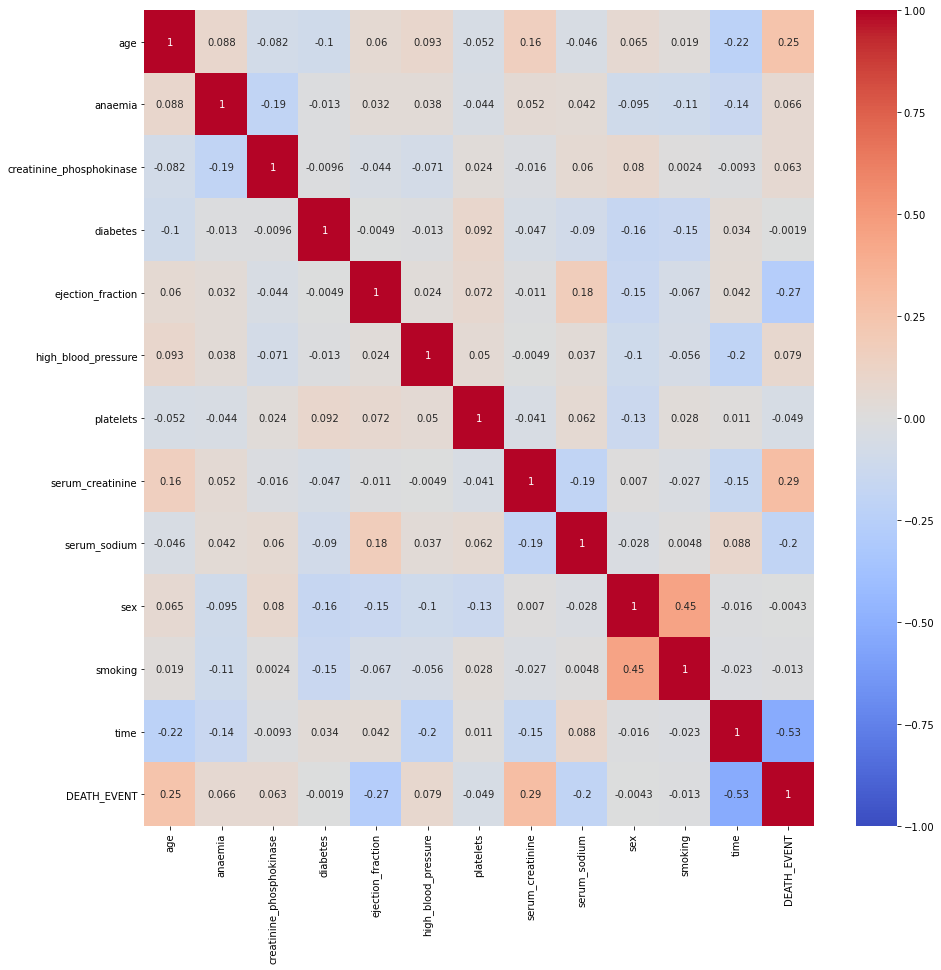

In [5]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [6]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.25
ejection_fraction   -0.27
serum_creatinine     0.29
serum_sodium        -0.20
time                -0.53
DEATH_EVENT          1.00
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

## Model Training and Prediction

In [7]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

### Linear Regression

Linear Regression Success Rate : 88.33%


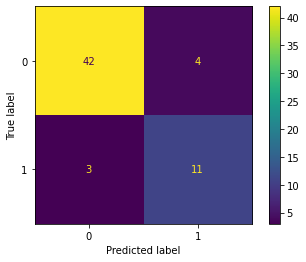

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

### Gradient Booster Classifier

Gradient Booster Classifier Success Rate : 85.00%


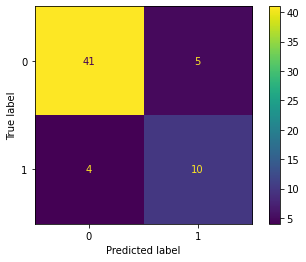

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

### Random Forest Classifier

Random Forest Classifier Success Rate : 83.33%


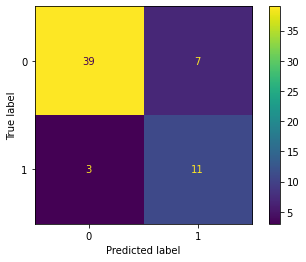

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

(Random Forest rate varies on each execution from 88.33% to 91.67%)

### Support Vector Machine

Support Vector Machine Success Rate : 90.00%


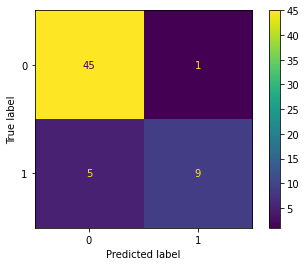

In [11]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

### K Nearest Neighbors

K Nearest Neighbors Top 5 Success Rates:
[93.33, 91.67, 90.0, 90.0, 90.0]


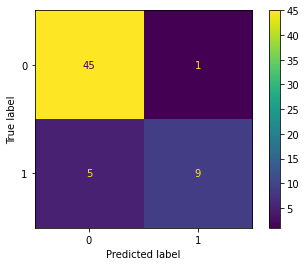

In [12]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

### Decision Tree Classifier

Decision Tree Classifier Top 5 Success Rates:
[86.67, 86.67, 86.67, 86.67, 83.33]


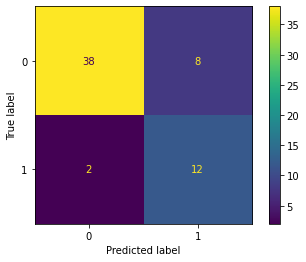

In [13]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

### Extra Gradient Booster Classifier

In [14]:
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid.fit(x_train,y_train,early_stopping_rounds=30,eval_set=[(x_test, y_test)])
p2x = grid.best_estimator_.predict(x_test)
s2x=accuracy_score(y_test,p2x)

[0]	validation_0-error:0.13333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.13333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.13333
[5]	validation_0-error:0.10000
[6]	validation_0-error:0.11667
[7]	validation_0-error:0.15000
[8]	validation_0-error:0.11667
[9]	validation_0-error:0.10000
[10]	validation_0-error:0.10000
[11]	validation_0-error:0.10000
[12]	validation_0-error:0.10000
[13]	validation_0-error:0.11667
[14]	validation_0-error:0.11667
[15]	validation_0-error:0.10000
[16]	validation_0-error:0.06667
[17]	validation_0-error:0.08333
[18]	validation_0-error:0.06667
[19]	validation_0-error:0.06667
[20]	validation_0-error:0.06667
[21]	validation_0-error:0.06667
[22]	validation_0-error:0.05000
[23]	validation_0-error:0.05000
[24]	validation_0-error:0.06667
[25]	validation_0-error:0.06667
[26]	validation_0-error:0.06667
[27]	validation_0-error:0.05000
[28]	validation_0-error:0.05000
[29]	validation_

Extra Gradient Booster Classifier Success Rate : 95.00%


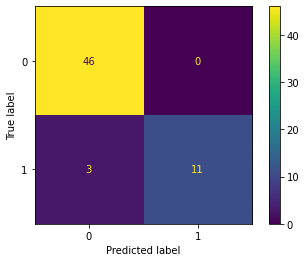

In [15]:
print("Extra Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2x))
plot_confusion_matrix(grid.best_estimator_, x_test, y_test)
plt.show()

## Final Results:

In [16]:
print(f'Gradient Booster Classifier: {round(100*s2, 2)}%\nDecision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\nLinear Regression: {round(100*s1, 2)}%\nSupport Vector Machine: {round(100*s4, 2)}%\nRandom Forest Classifier: {round(100*s3, 2)}%\nK Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\nExtra Gradient Booster Classifier: {round(100*s2x, 2)}%')

Gradient Booster Classifier: 85.0%
Decision Tree Classifier: 86.67%
Linear Regression: 88.33%
Support Vector Machine: 90.0%
Random Forest Classifier: 83.33%
K Nearest Neighbors: 93.33%
Extra Gradient Booster Classifier: 95.0%


<p style="font-size:15px; font-family:verdana;">This notebook was recently updated to be more presentable with fancy markdowns.</p>
<p style="font-size:15px; font-family:verdana;">The notebook that inspired me to do this is available here: <a href="https://www.kaggle.com/shubhamksingh/create-beautiful-notebooks-formatting-tutorial" target="_blank">🏆Create Beautiful Notebooks : Formatting Tutorial</a><p style="font-size:15px; font-family:verdana;">

<p style="font-size:15px; font-family:verdana;"><b>Thanks for reading my notebook!😃</b></p>